<a href="https://colab.research.google.com/github/fathanick/Fundamentals-of-Data-Science/blob/main/Naive%20Bayes/Naive_Bayes_02_Caesarian_Section_Classification_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from scipy.io import arff
import pandas as pd

In [3]:
# Define the path to the ARFF file
file_path = '/content/sample_data/caesarian.csv.arff'

# Load the ARFF file
data, meta = arff.loadarff(file_path)

# Convert the structured NumPy array to a pandas DataFrame
df = pd.DataFrame(data)

# Decode byte strings to regular strings for object columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.decode('utf-8')

# Display the first 5 rows of the DataFrame
display(df.head())

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [5]:
# Define the features

X = df.drop(["Caesarian"], axis = 1)
X.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem
0,22,1,0,2,0
1,26,2,0,1,0
2,26,2,1,1,0
3,28,1,0,2,0
4,22,2,0,1,0


In [6]:
# Define the target label

y = df["Caesarian"]
y.head()

,Caesarian
0,0
1,1
2,0
3,0
4,1


In [9]:
# Split the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [10]:
# Create the classification model

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [11]:
# Predict the test data

y_pred = model.predict(x_test)

In [12]:
# Show the classification report results

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.75      0.86      0.80         7

    accuracy                           0.81        16
   macro avg       0.81      0.82      0.81        16
weighted avg       0.82      0.81      0.81        16



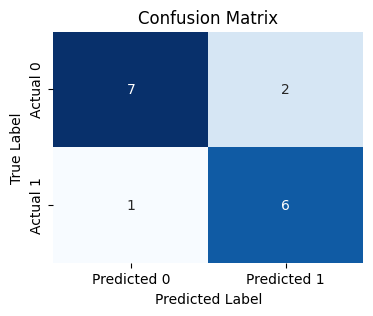

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()